# GETTING AND LOADING A CORPUS

https://nlpforhackers.io/corpora/
http://lucumr.pocoo.org/2015/11/18/pythons-hidden-re-gems/

The goal of this step is to develop an initial list of each character and their spoken lines, or a cleanish list of the lines within the text. (Dictionaries are Hash value arbitrary, so may not be ordered the same. Lists are used instead.)

In [7]:
# Select and Read a file into "f" using a list and stripping out all Project Gutenberg headers and footers

from pathlib import Path
import re
data_folder = Path("data/wilde/")
file_to_open = data_folder / "pg844.txt"
f = open(file_to_open, 'r')
first_document = list(f)
#print(first_document)

"""
If a text is (usually) prefaced with a reference to the library, such as:
1.) The Project Gutenberg eBook, The Importance of Being Earnest, by Oscar
2.) Project Gutenberg Etext of Twelfth Night by Shakespeare
3.) Project Gutenberg’s Romeo and Juliet, by William Shakespeare
4.) *** START OF THIS PROJECT GUTENBERG EBOOK COMMON SENSE ***
or others including the text "project gutenberg", we should be able to find 
that text and filter it out. Also things such as title, author and publication 
date should be approximately co-located and thus identifiable as well.
"""

'\nIf a text is (usually) prefaced with a reference to the library, such as:\n1.) The Project Gutenberg eBook, The Importance of Being Earnest, by Oscar\n2.) Project Gutenberg Etext of Twelfth Night by Shakespeare\n3.) Project Gutenberg’s Romeo and Juliet, by William Shakespeare\n4.) *** START OF THIS PROJECT GUTENBERG EBOOK COMMON SENSE ***\nor others including the text "project gutenberg", we should be able to find \nthat text and filter it out. Also things such as title, author and publication \ndate should be approximately co-located and thus identifiable as well.\n'

In [16]:
#Determine if text is a Project Gutenberg library text
r = re.compile("(project gutenberg)", re.IGNORECASE)
guten = False
for line in first_document:
    srch = r.search(line)
    if srch:
        guten = True
    else:
        break
print(guten)

True


In [25]:
#If the text is a Project Gutenberg text then strip away all headers
"""
Headers end in:
1.) *** START OF THIS PROJECT GUTENBERG EBOOK SIDDHARTHA ***
2.) *** START OF THE PROJECT GUTENBERG EBOOK, THE ADVENTURES OF SHERLOCK HOLMES ***
3.) *END*THE SMALL PRINT! FOR PUBLIC DOMAIN ETEXTS*Ver.04.29.93*END*/n/n/n/n/n
This etext was prepared by the PG Shakespeare Team,/n
a team of about twenty Project Gutenberg volunteers.
4.) *** START OF THIS PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***/n/n/n/n/n
This etext was prepared by the PG Shakespeare Team,/n
a team of about twenty Project Gutenberg volunteers.
"""

#for a in range(0, 50):
    #print(first_document[a])
header_start_index = 0
header_end_index = 0

r = re.compile("(START OF)|(END*THE SMALL PRINT)")
for a in range(len(first_document)):
    srch = r.search(first_document[a])
    if srch:
        header_end_index = a
print(header_end_index)


28


In [31]:
#If the text is a Project Gutenberg text then strip away all footers
"""
Footers begin in:
1.) *** END OF THIS PROJECT GUTENBERG EBOOK SIDDHARTHA ***
2.) *** END OF THE PROJECT GUTENBERG EBOOK, THE ADVENTURES OF SHERLOCK HOLMES ***
3.) End of
4.) END OF
"""

footer_start_index = 0

r = re.compile("(end of)", re.IGNORECASE)
for b in range(len(first_document)):
    srch = r.search(first_document[b])
    if srch:
        footer_start_index = b
print(footer_start_index)

3136


In [35]:
script = []
for c in range(header_end_index+1, footer_start_index-1):
    script.append(first_document[c])
    #print(first_document[c])
print(script)

['\n', '\n', '\n', '\n', '\n', '\n', 'Transcribed from the 1915 Methuen & Co. Ltd. edition by David Price,\n', 'email ccx074@pglaf.org\n', '\n', '\n', '\n', '\n', '\n', 'The Importance of Being Earnest\n', 'A Trivial Comedy for Serious People\n', '\n', '\n', 'THE PERSONS IN THE PLAY\n', '\n', '\n', 'John Worthing, J.P.\n', 'Algernon Moncrieff\n', 'Rev. Canon Chasuble, D.D.\n', 'Merriman, Butler\n', 'Lane, Manservant\n', 'Lady Bracknell\n', 'Hon. Gwendolen Fairfax\n', 'Cecily Cardew\n', 'Miss Prism, Governess\n', '\n', '\n', '\n', '\n', 'THE SCENES OF THE PLAY\n', '\n', '\n', "ACT I.  Algernon Moncrieff's Flat in Half-Moon Street, W.\n", '\n', 'ACT II.  The Garden at the Manor House, Woolton.\n', '\n', 'ACT III.  Drawing-Room at the Manor House, Woolton.\n', '\n', 'TIME: The Present.\n', '\n', '\n', '\n', '\n', "LONDON: ST. JAMES'S THEATRE\n", '\n', '\n', 'Lessee and Manager: Mr. George Alexander\n', '\n', 'February 14th, 1895\n', '\n', '* * * * *\n', '\n', 'John Worthing, J.P.: Mr. Geo

In [36]:
#START HERE, SKIP LINE/ACTOR PARSING, WORK ON SENTENCES
"""
If a text is a script for a theatre play or film, then each line would be spoken by a speaker.
These too can be filtered out and identified. In such a way, the text can also be identified as
a script as well.
"""
#Compile a list of speakers
r = re.compile("[A-Z0-9][A-Z0-9]+")
speakers = []
for line in script:
    mtch = r.match(line)
    if mtch:
        speakers.append(mtch.group())
print(speakers)

#Omit speakers from the list of text
s = re.compile(r"\b[A-Z{3}\.]+\b")
spoken = list(filter(lambda i: not r.search(i), script))

#print(spoken)

['THE', 'THE', 'ACT', 'ACT', 'ACT', 'TIME', 'LONDON', 'FIRST', 'SCENE', 'ACT', 'SECOND', 'SCENE', 'ACT', 'THIRD', 'SCENE', '1840', 'TABLEAU']


# RE-CREATING SENTENCES AND PHRASES

During this step, we concatenate lines in batches to allow the identification of sentences with regular expressions. Then we identify phrases with stop words.

In [ ]:
#Concatenate lines into list entries for future sentence splitting

newLines = []
singleLine = ''
singleLines = []

#Remove all line returns
for j in range(0, len(spoken)):
    spoken[j] = spoken[j].replace('\n', '')
    
#Split 5 lines at a time into new list
for k in range( 0, len(spoken), 3):
    newLines = []
    for line in range( 0, 3 ):
        try:
            newLines.append(' '+spoken[line+k])
        except:
            #print("Index Error at", k, line)
            break
    #Join 5-line groups into one line and append to a list
    singleLine = ''.join(newLines)
    singleLines.append(singleLine)

print(singleLines)

In [ ]:
#Create list of sentences
sentences = []
for m in range(0, len(singleLines)):
    mtch = re.findall("[A-Z][^\.!?]*[\.!?]", singleLines[m], re.M|re.I)
    if mtch:
        sentences.append(mtch)

for n in range(0, 5):
    print(sentences[n])

In [ ]:
#Clean the stopword list
stoplist = []
clean_line = []
data_folder = Path("data/")
file_to_open = data_folder / "snowball_stop.txt"
f = open(file_to_open, 'r')
full_stop = list(f)

for n in range( 0, len(full_stop), 1 ):
    clean_line = full_stop[n].split('|')
    stoplist.append(clean_line[0])

for p in range(len(stoplist)):
    stoplist[p] = stoplist[p].replace('\n', '')
    
#print(stoplist)

In [ ]:
# Create list of phrases using stopwords
phrases = []
candidate_phrases = []

for q in range(len(sentences)):
    for r in sentences[q]:
        words = re.split("\\s+", r)
        previous_stop = False
 
        # Examine each word to determine if it is a phrase boundary marker or part of a phrase or alone
        for w in words:
 
            if w in stoplist and not previous_stop:
                # phrase boundary encountered, so put a hard indicator
                candidate_phrases.append(";")
                previous_stop = True
            elif w not in stoplist and len(w) > 3:
                # keep adding words to list until a phrase boundary is detected
                candidate_phrases.append(w.strip())
                previous_stop = False
 
    # Create a list of candidate phrases without boundary demarcation
    phrases = re.split(";+", ' '.join(candidate_phrases))

# Clean up phrases    
re2 = re.compile('[^\.!?,"(){}\*:]*[\.!?,"(){}\*:]')
for s in range(len(phrases)):
    phrases[s] = re.sub(re2, '', phrases[s])
    phrases[s] = phrases[s].strip(' ')
    phrases[s] = phrases[s].replace(' ', '_')
    phrases[s] = phrases[s].replace('__', '_')
    phrases[s] = phrases[s].strip('_')

for s in range(len(phrases)):
    try:
        phrases.remove('')
        phrases.remove(' ')
        phrases.remove('/n')
    except:
        pass
    
for t in range(50):
    print(phrases[t])

#print(phrases)

# TERM FREQUENCY–INVERSE DOCUMENT FREQUENCY (TF-IDF)
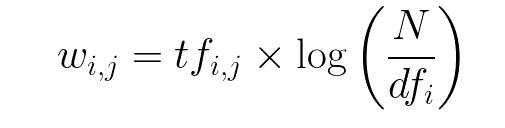
The quintessential early Natural Language Processing tool, the TF-IDF analysis for context and sentiment evaluation is useful only over a large corpus. It must be understood that the corpus is not just a sample to be evaluated, but instead is the entire population that sets a 'benchmark' for evaluation, if you will. 

Here we establish a Term Frequency (TF) count of word frequencies, just as we showed a phrase frequency count in the last step in this notebook.

In [ ]:
#Establish wordList
wordList = []
for u in range(len(sentences)):
    for v in sentences[u]:
        words = re.split("\\s+", v)
        wordList.extend(words)
        
for w in range(50):
    print(wordList[w])

In [ ]:
#Establish wordDict
wordDict = {}
for w in range(len(wordList)):
    newWord = wordList[w]
    newWord = newWord.lower()
    newWord = newWord.replace('.', '')
    wordDict[w] = newWord
#print(wordDict)
    
#Perform word counts on dict
countDict = {}
for x in range(len(wordDict)):
    term = wordDict[x]
    count = 1
    for y in range(len(wordDict)):
        try:
            if wordDict[y].find(term) > 0:
                count += 1
        except:
            pass
        countDict[term] = count

for k, v in countDict.items():
    print(k, v)

In [ ]:
# Computes ratio of word's appearances to total words
bow = wordList
bowCount = len(bow) #BOW = Bag of Words
tfDict = {}
for term, count in countDict.items():
    tfDict[term] = count/float(bowCount)

num = dict(sorted(tfDict.items(), key=lambda x: x[1], reverse = True))
#for (k, v in num.items()):
    #print(k, v)

# PERFORM A PHRASE FREQUENCY COUNT

Now we can identify common phrases by performing a frequency count on each phrase.  Moreover, if the corpus is large enough, commonly used phrases will be evident with higher counts across many texts.  For this reason the phrase list along with counts, will be stored in a file.

In [ ]:
# Phrase frequency count
from operator import itemgetter
wordfreq = []
for u in range(len(phrases)):
    utterance = phrases[u]
    uttcnt = 0
    uttcnt = phrases.count(utterance)
    if uttcnt > 1:
        wordfreq.append(uttcnt)
    
zipped = list(zip(phrases, wordfreq))
sortzip = sorted(zipped, key=itemgetter(1), reverse=True)
phraseFreqDict = dict(sortzip)


In [ ]:
"""
If a sentence is usually 'subject' then 'verb' and then 'noun', we could assume that a good sentence or 
phrase (which could or also could not be a sentence), would have that structure. Simply, the common research topics 
of 'attention' 'sentiment' and 'semantics' match these structural terms in functionality, at least somewhat. 
We use a trifecta of unit vectors initially therefore to represent each of these terms, and apply them in a relatively 
intuitive fashion. Semantics are often considered ordinal and therefore a vector in 3-space could be (1,1,0). Taking a 
cartesian approach to the 3-space, Sentiment could be described as (1,0,1) when flat and Attention has been described 
as nearly orthogonal to sentiment and could therefore be (0,1,1).
"""

import xxhash, numpy
from keras.preprocessing.text import one_hot

phraseDictH = {}
# Estimate the size of the vocabulary
vocabSize = len(phrases)
docSize = len(spoken)
phraseFreqs = phraseFreqDict.values()
phraseVocab = phraseFreqDict.keys() 

# Return a dictionary whose keys are phrase tokens, the values are the indices       
#START HERE
for key,val in phraseFreqDict.items():
    newPhrase = phraseFreqDict[val]
    print(newPhrase)
    # First Hash the Phrases
    hashedPhrase = xxhash.xxh32(newPhrase, seed=60155748).hexdigest()
    # Second, Pad the Hashes if they are NOT in hex (this is worth trying since hex is not ideal for text)
    # Third, Vectorize the Padded or hex Hashes, using an embedding vector set from attention, semantics, 
    # or sentiment
    phraseDictH[z] = hashedPhrase
    
# Last, One-Hot the Vectors
hashSize = len(hashedPhrase)

print(sortzip[ v(0) ])

array = numpy.zeros( (docSize, hashSize, vocabSize), dtype=float, order='F')
for i in range(26): #This is the Z-axis    
    for j in enumerate(phraseDictH):
        array[i, j, phraseDictH[phraseDictH[z]]] = 1 #Here, the third param must be the IDF?

result = encoder_input_data
print(result)


## Testing the encoding
The TF-IDF and One-Hot encoder, should produce nearly the same output.  One-Hot produces a Gaussian Intensity for a phrase amongst the list of phrases, while the Inverse Document Frequency should do similarly.

## TO BE CONTINUED...
At this point, this notebook is finished. Please refer to Part 2 for a continuation of this process, wherein the code in this notebook is converted into objects and a multiple document corpus is compiled.